In [1]:
#import packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor # Install ANN model 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from ta import add_all_ta_features # Library that does financial technical analysis 

#to plot within notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
# Importing the training set
df = pd.read_csv('Data/BANK-OF-AFRICA.csv', index_col="Date", parse_dates=True)

# Add all technical analysis to the dataframe we've already loaded
df = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

target_col = 'Close'

C:\Users\bentaleb.khalid\Anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\bentaleb.khalid\Anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [3]:
df

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,66.08,66.37,66.37,66.37,17486.29,0.000000e+00,17486.29,0.000000,0.000000,50.000000,...,-50.000000,0.000000,66.370000,0.000000,0.000000,0.000000,0.000000,-58.738714,0.000000,0.000000
2000-01-04,65.98,66.18,66.18,66.18,17882.32,0.000000e+00,-396.03,0.000000,-3397.640800,0.000000,...,-100.000000,0.000000,66.280452,0.000000,0.180365,0.036073,0.144292,-0.286274,-0.286684,-0.286274
2000-01-05,65.98,66.18,66.18,66.18,1584.12,0.000000e+00,1188.09,0.000000,-2912.263543,0.000000,...,-100.000000,0.000000,66.234484,0.000000,-7.616274,-1.494396,-6.121878,0.000000,0.000000,-0.286274
2000-01-06,65.49,65.68,65.68,65.68,8773.61,0.000000e+00,-7585.52,0.000000,-3122.912322,0.000000,...,-100.000000,0.000000,65.988047,0.000000,-10.497232,-3.294963,-7.202268,-0.755515,-0.758384,-1.039626
2000-01-07,65.88,65.78,65.78,65.78,7717.53,0.000000e+00,132.01,0.000000,-2566.531562,22.389860,...,-85.507246,0.000000,65.896550,0.000000,-13.466437,-5.329258,-8.137179,0.152253,0.152138,-0.888956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,185.50,189.95,185.50,186.00,3287.00,5.873649e+07,98250727.27,-0.110879,186202.947951,88.174745,...,-33.544304,7.937794,39.432218,1.362398,-17.590869,9.749322,-27.340191,0.269542,0.269179,180.247100
2021-11-15,186.00,186.00,186.00,186.00,1850.00,5.873649e+07,98252577.27,-0.116959,159602.526815,87.926119,...,-45.106383,7.004559,39.432218,1.362398,-24.491042,2.901250,-27.392291,0.000000,0.000000,180.247100
2021-11-16,186.00,186.00,186.00,186.00,31928.00,5.873649e+07,98284505.27,-0.127955,136802.165842,87.804947,...,-46.902655,6.523676,39.432218,0.000000,-27.203731,-3.119747,-24.083985,0.000000,0.000000,180.247100


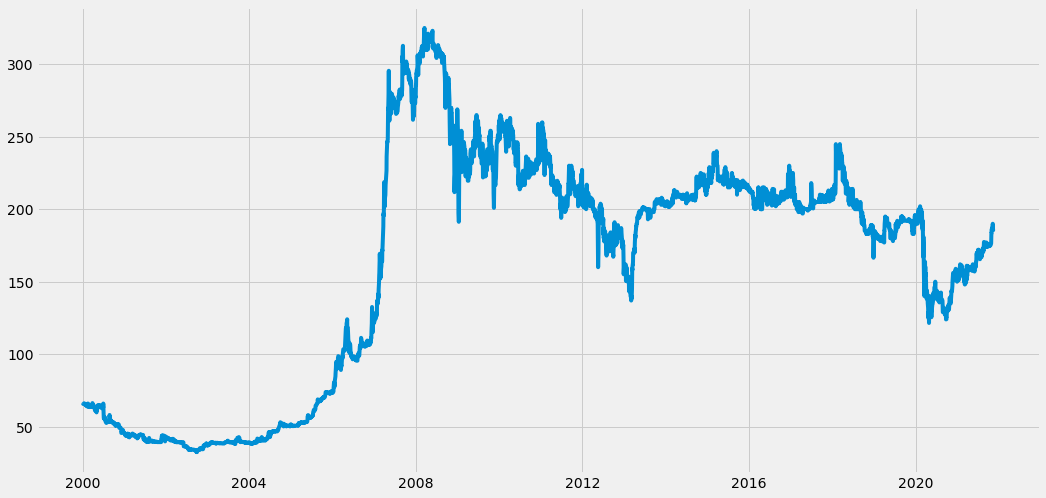

In [3]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df[target_col], label='Close Price history')

In [4]:
from sklearn.model_selection import train_test_split
# Split data into testing and training sets
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

train = X_train
train[target_col] = y_train
test = X_test
test[target_col] = y_test

<ipython-input-4-a4159721eed8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[target_col] = y_train
<ipython-input-4-a4159721eed8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target_col] = y_test


# Linear Regression

In [5]:
# Regreesion Function
def LinearRegression_fnc(X_train, y_train, X_test, y_test):
    # inputs: x train data, y train data, x test data, y test data (all dataframe's)
    # output: the predicted values for the test data (list)
    
    #scaling data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    
    lr_MSE = mean_squared_error(y_test, lr_pred)
    lr_MAE = mean_absolute_error(y_test, lr_pred)
    lr_RMS = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(lr_pred)),2)))
    lr_R2 = lr.score(X_test, y_test)
    lr_RR2 = r2_score(y_test, lr_pred)
    print('Linear Regression R2: {}'.format(lr_R2))
    print("Coefficient of Determination: {}".format(lr_RR2))
    print('Linear Regression Mean Absolute Error: {}'.format(lr_MAE))
    print('Linear Regression MSE: {}'.format(lr_MSE))
    print('Linear Regression RMS: {}'.format(lr_RMS))

    return lr_pred

In [6]:
lr_pred = LinearRegression_fnc(X_train, y_train, X_test, y_test)

Linear Regression R2: 1.0
Coefficient of Determination: 1.0
Linear Regression Mean Absolute Error: 7.187924828794122e-14
Linear Regression MSE: 7.107146303193876e-27
Linear Regression RMS: 8.430389257438755e-14


# ANN

In [7]:
# ANN Function 
def ANN_func(X_train, y_train, X_test, y_test):   
    # Scaling data
    # scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    MLP = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes = (100,), activation = 'identity',learning_rate = 'adaptive').fit(X_train_scaled, y_train)
    MLP_pred = MLP.predict(X_test_scaled)
    
    MLP_MSE = mean_squared_error(y_test, MLP_pred)
    MLP_MAE = mean_absolute_error(y_test, MLP_pred)
    MLP_RMS = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(MLP_pred)),2)))
    MLP_R2 = MLP.score(X_test_scaled, y_test)
    MLP_RR2 = r2_score(y_test, MLP_pred)
    print('Muli-layer Perceptron R2 Test: {}'.format(MLP_R2))
    print("Coefficient of Determination: {}".format(MLP_RR2))
    print('Multi-layer Perceptron Mean Absolute Error: {}'.format(MLP_MAE))
    print('Multi-layer Perceptron MSE: {}'.format(MLP_MSE))
    print('Multi-layer Perceptron RMS: {}'.format(MLP_RMS))

    return MLP_pred

In [8]:
MLP_pred = ANN_func(X_train, y_train, X_test, y_test)

Muli-layer Perceptron R2 Test: 0.9993997995063664
Coefficient of Determination: 0.9993997995063664
Multi-layer Perceptron Mean Absolute Error: 0.440015875809068
Multi-layer Perceptron MSE: 0.4261532508973699
Multi-layer Perceptron RMS: 0.6528041443628938


In [9]:
# Function to make the plots
def PlotModelResults(train, test, pred):
    test['Predictions'] = 0
    test['Predictions'] = pred

    test.index = X_test.index
    train.index = X_train.index

    plt.figure(figsize=(16,8))
#     plt.plot(train['Close'], label='Train Actual')
    plt.plot(test['Close'], label='Test Actual')
    plt.plot(test['Predictions'], label='Our Prediction')
    plt.title('Stock Price')
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')

<ipython-input-9-24dda2c29341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
<ipython-input-9-24dda2c29341>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


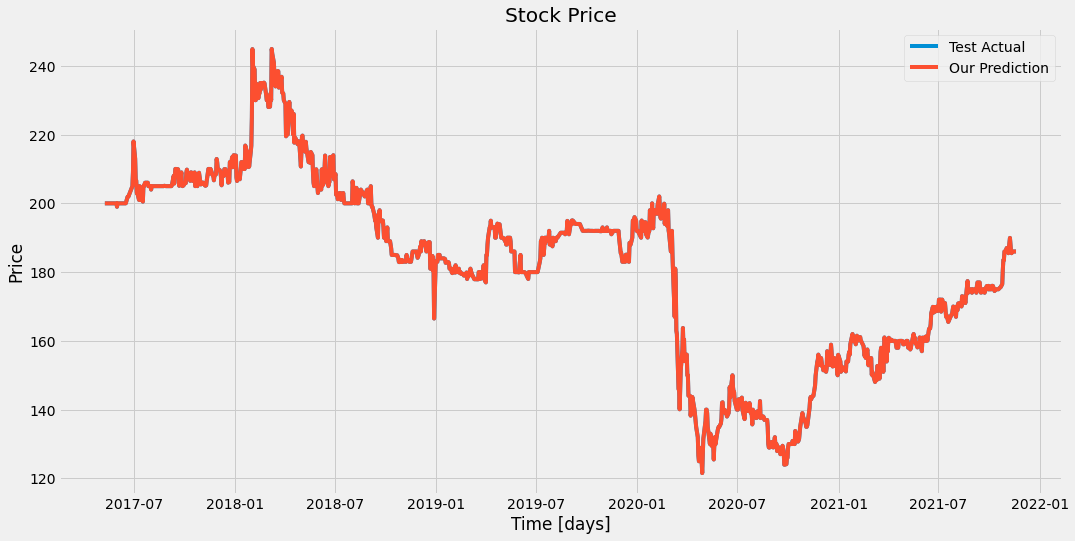

In [10]:
PlotModelResults(train, test, lr_pred)

<ipython-input-9-24dda2c29341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
<ipython-input-9-24dda2c29341>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


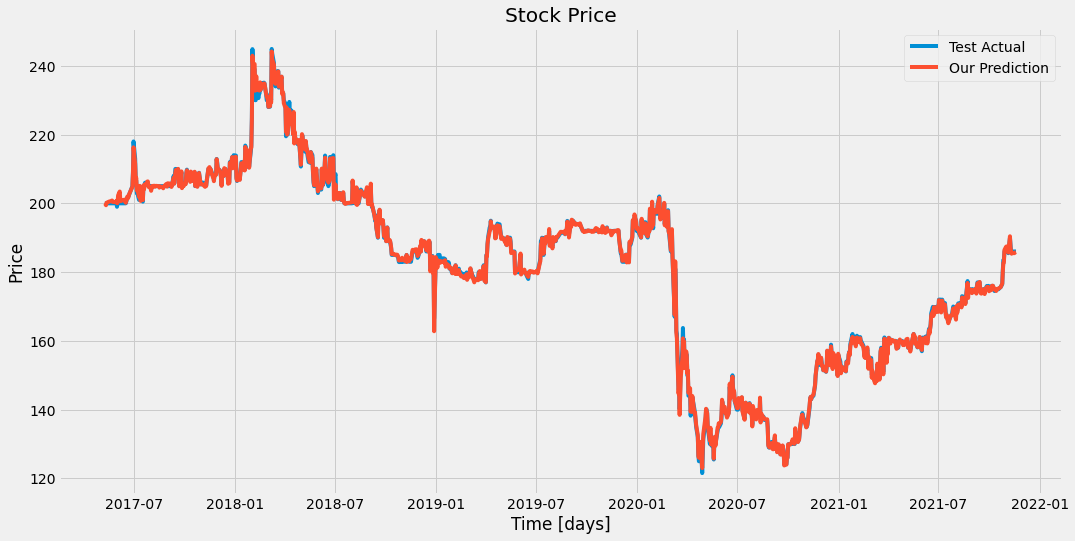

In [11]:
PlotModelResults(train, test, MLP_pred)